In [761]:
#Cargar la biblioteca pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [762]:
#Creamos un data frame a partir del archivo que leemos
df0=pd.read_csv('hermosillo.dat')

In [763]:
#Creamo una columa de tipo tiempo y borramos la anterior
df0['FECHA'] = pd.to_datetime(df0.apply(lambda x: x['TIMESTAMP'], 1), dayfirst=True)
df0 = df0.drop(['TIMESTAMP'], 1)

In [764]:
#Crea una columna de los meses
df0['MES'] = pd.DatetimeIndex(df0["FECHA"]).month

#Crea una columna de años
df0["AÑO"] = pd.DatetimeIndex(df0["FECHA"]).year

#Crea una columna de los dias
df0["DIA"] = pd.DatetimeIndex(df0["FECHA"]).day

#Crea una columna de las horas
df0["HOR"] = pd.DatetimeIndex(df0["FECHA"]).hour



In [765]:
#Creamos otro dataframe con las columas que ocuparemos
df=df0[["FECHA","AirTC_Avg","HOR","DIA","MES","AÑO"]]


In [766]:
#Dividimos el dataframe a partir del tiempo donde comenzaremos el analsisis (Primero de noviembre)
df=df.loc[(df['FECHA']>='2018-11-01 00:00:00')]


In [767]:
#Vemos de que tipo son las variables
df.dtypes

FECHA        datetime64[ns]
AirTC_Avg           float64
HOR                   int64
DIA                   int64
MES                   int64
AÑO                   int64
dtype: object

In [768]:
#Sacamos un promedio de las temperaturas, por hora
df['TPROM']=df.groupby(['AÑO','MES','DIA','HOR'])['AirTC_Avg'].transform('mean')


In [769]:
#Determinamos el valor de UF por hora, a partir de restricciones
condicion=[(df["TPROM"]>=1.5) & (df["TPROM"]<=2.4),
          (df["TPROM"]>=2.5) & (df["TPROM"]<=9.1),
          (df["TPROM"]>=9.2) & (df["TPROM"]<=12.4),
          (df["TPROM"]>=12.5) & (df["TPROM"]<=15.9),
          (df["TPROM"]>=16) & (df["TPROM"]<=18),
          (df["TPROM"]>18)]
resultados=[0.5,1,0.5,0,-.5,-1]
df["UF"]= np.select(condicion,resultados,default=0)

In [770]:
#Determinamos el valor de UF24 que es la suma de UF por dia
df['UF24']=df.groupby(['AÑO','MES','DIA',"HOR"])['UF'].transform('sum')

In [771]:
#Determinamos la temperatura máxima por dia
df['TMAX']=df.groupby(['AÑO','MES','DIA'])['AirTC_Avg'].transform('max')

In [772]:
##Determinamos la temperatura mínima por dia
df['TMIN']=df.groupby(['AÑO','MES','DIA'])['AirTC_Avg'].transform('min')

In [795]:
#Quitamos del dataframe columas que ya no nos sirven y muestran el UF24 Y EL TMAX, TMIN EN LA MISMA TABLA
df.drop(["FECHA","AirTC_Avg","UF","HOR"], axis = 1, inplace = True, errors = 'ignore')
df.head()

,DIA,MES,AÑO,TPROM,UF24,TMAX,TMIN
24935,1,11,2018,8.708333,6.0,29.58,6.096
24936,1,11,2018,8.708333,6.0,29.58,6.096
24937,1,11,2018,8.708333,6.0,29.58,6.096
24938,1,11,2018,8.708333,6.0,29.58,6.096
24939,1,11,2018,8.708333,6.0,29.58,6.096


<Figure size 864x595.44 with 0 Axes>

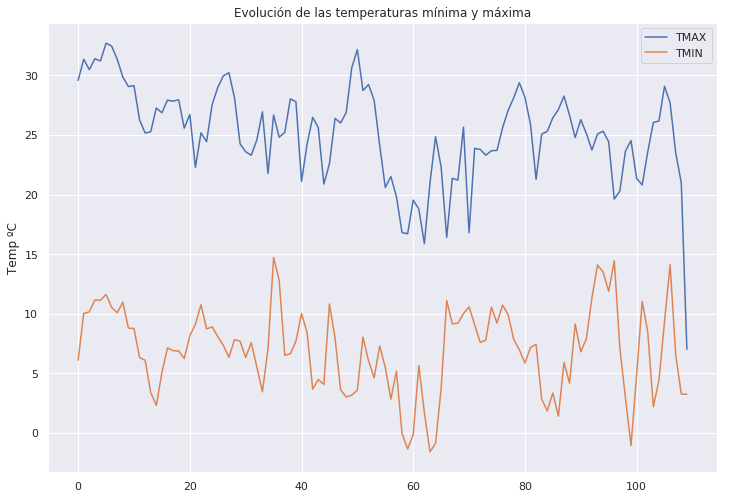

In [792]:
df1=df.drop(["TPROM", "UF24"],1)
df1=df1.drop_duplicates()
f=len(df1)
df1.index = np.arange(0,f)
df1.head()
df2=pd.DataFrame({})
df2["day"]=df1.DIA
df2["month"]=df1.MES
df2["year"]=df1.AÑO
df2.index = np.arange(0,f)
df2.head()
i=pd.to_datetime(df2)
df1["FECHA"]=i
df4 = df1[['TMAX', "TMIN"]]
fig=plt.figure(); df4.plot(); plt.legend(loc='best')
plt.title("Evolución de las temperaturas mínima y máxima")
plt.ylabel("Temp ºC")
plt.grid(True)

In [793]:
df1=df.drop(["TPROM", "TMAX" , "TMIN"],1)
f=len(df1)
df1.index = np.arange(0,f)
df1.head()
df2=pd.DataFrame({})
df2["day"]=df1.DIA
df2["month"]=df1.MES
df2["year"]=df1.AÑO
df2.index = np.arange(0,f)
df2.head()
i=pd.to_datetime(df2)
df1["FECHA"]=i
df2=df1.drop(["DIA","MES","AÑO"],1)

In [794]:
df2= df2.resample('d', on='FECHA').mean().dropna(how='all')

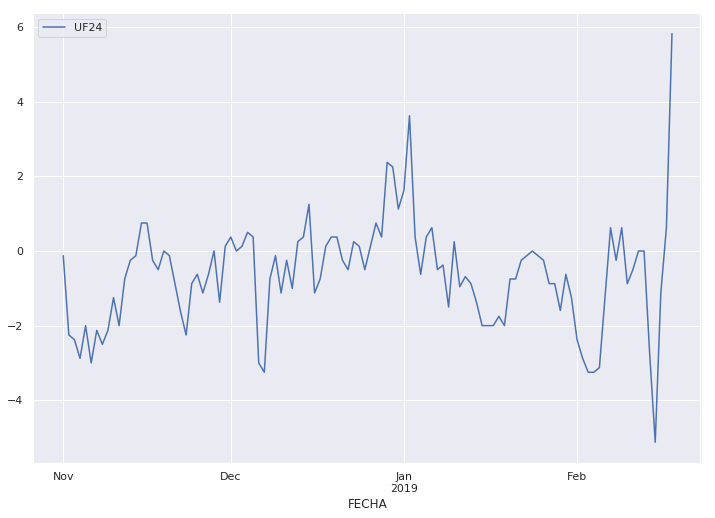

In [791]:
df2.reset_index().plot(x="FECHA",y=["UF24"])